In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

import gensim

import scikitplot.plotters as skplt

import nltk

from xgboost import XGBClassifier

import os

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
wkdir = '/projects/trans_scratch/validations/workspace/szong/deep_learning/'

f = '{}training_text'.format(wkdir)
df_train_txt = pd.read_csv(f, sep='\|\|', header=None, skiprows=1, names=["ID","Text"])
df_train_txt.head()

df_train_txt.shape

f2 = '{}training_variants'.format(wkdir)
df_train_var = pd.read_csv(f2)
df_train_var.head()

df_train_var.Class.unique()

df_train_var.shape

f3 = '{}test_text'.format(wkdir)
df_test_txt = pd.read_csv(f3, sep='\|\|', header=None, skiprows=1, names=["ID","Text"])
df_test_txt.head()

f4 = '{}test_variants'.format(wkdir)
df_test_var = pd.read_csv(f4)
df_test_var.head()

df_train = pd.merge(df_train_var, df_train_txt, how='left', on='ID')
df_train.head()

df_test = pd.merge(df_test_var, df_test_txt, how='left', on='ID')
df_test.head()

df_train.describe(include='all')

df_test.describe(include='all')

df_train['Class'].value_counts().plot(kind="bar", rot=0)

In [18]:
def evaluate_features(X, y, clf=None):
    """General helper function for evaluating effectiveness of passed features in ML model
    
    Prints out Log loss, accuracy, and confusion matrix with 3-fold stratified cross-validation
    
    Args:
        X (array-like): Features array. Shape (n_samples, n_features)
        
        y (array-like): Labels array. Shape (n_samples,)
        
        clf: Classifier to use. If None, default Log reg is use.
    """
    if clf is None:
        clf = LogisticRegression()
    
    probas = cross_val_predict(clf, X, y, cv=StratifiedKFold(random_state=8), 
                              n_jobs=-1, method='predict_proba', verbose=2)
    pred_indices = np.argmax(probas, axis=1)
    classes = np.unique(y)
    preds = classes[pred_indices]
    print('Log loss: {}'.format(log_loss(y, probas)))
    print('Accuracy: {}'.format(accuracy_score(y, preds)))
    skplt.plot_confusion_matrix(y, preds)

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished


Log loss: 0.3453069138000431
Accuracy: 0.9466666666666667


/home/szong/anaconda3/envs/szvenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


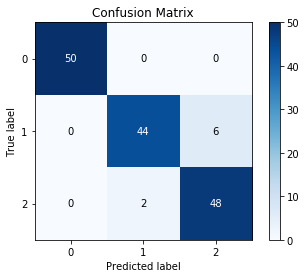

In [19]:
# Quick test of evaluate_features
from sklearn.datasets import load_iris
evaluate_features(*load_iris(True))

Start with a simple baseline. Bag of words

In [21]:
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)    

In [26]:
bag_of_words = count_vectorizer.fit_transform(df_train['Text'])

In [ ]:
len(count_vectorizer.get_feature_names())

In [ ]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_bag_of_words = svd.fit_transform(bag_of_words)b


In [ ]:
evaluate_features(truncated_bag_of_words, df_train['Class'].values.ravel())

In [ ]:
evaluate_features(truncated_bag_of_words, df_train['Class'].values.ravel(), 
                  RandomForestClassifier(n_estimators=1000, max_depth=5, verbose=1))